In [1]:
# Install if missing
!pip install seaborn scikit-learn imbalanced-learn xgboost

# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE


In [35]:
#  dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data"
columns = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'GlassType']
df = pd.read_csv(url, names=columns, index_col=False)

df.drop("Id", axis=1, inplace=True)

print(df.head())
print(df.info())
print(df.describe())


        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  GlassType
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0          1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0          1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0          1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0          1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0          1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RI         214 non-null    float64
 1   Na         214 non-null    float64
 2   Mg         214 non-null    float64
 3   Al         214 non-null    float64
 4   Si         214 non-null    float64
 5   K          214 non-null    float64
 6   Ca         214 non-null    float64
 7   Ba         214 non-null    float64
 8   Fe         214 non-null    float64
 9   GlassType  214 non-null    int

In [3]:
print("Missing values:\n", df.isnull().sum())


Missing values:
 RI           0
Na           0
Mg           0
Al           0
Si           0
K            0
Ca           0
Ba           0
Fe           0
GlassType    0
dtype: int64


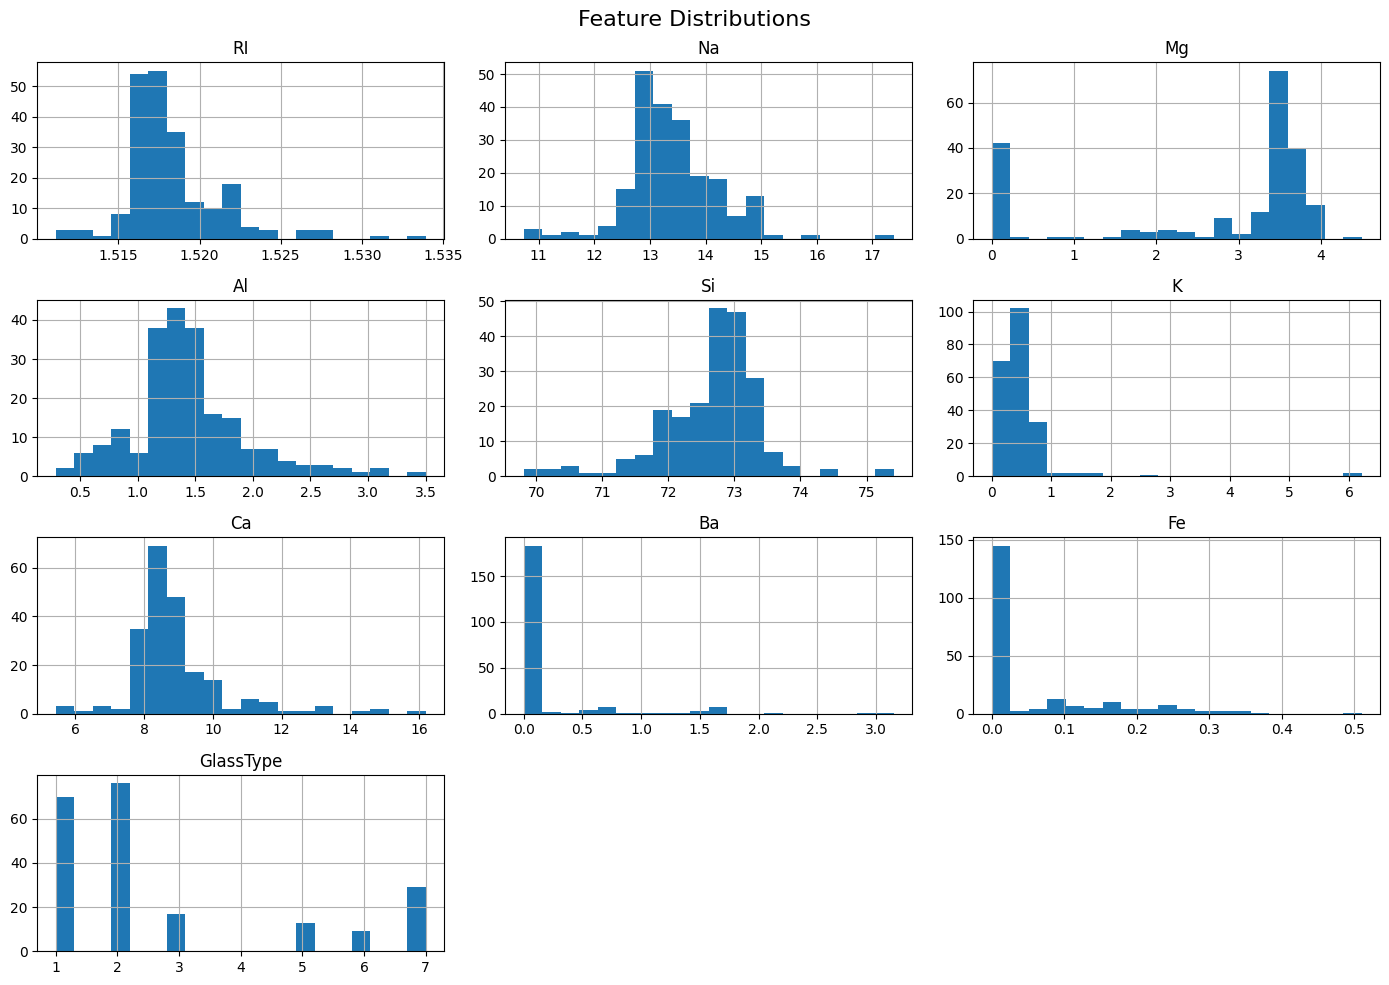

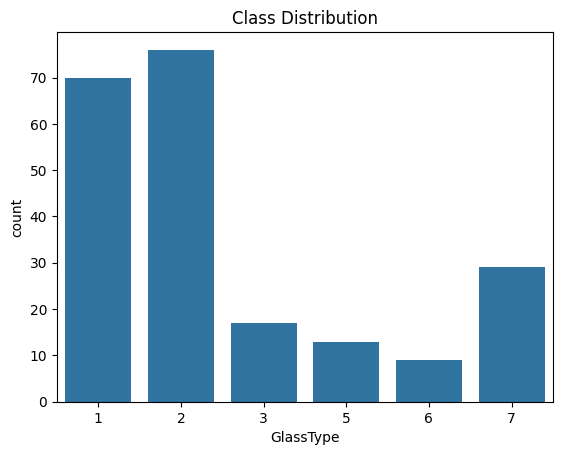

In [4]:

df.hist(bins=20, figsize=(14, 10))
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

sns.countplot(data=df, x='GlassType')
plt.title('Class Distribution')
plt.show()


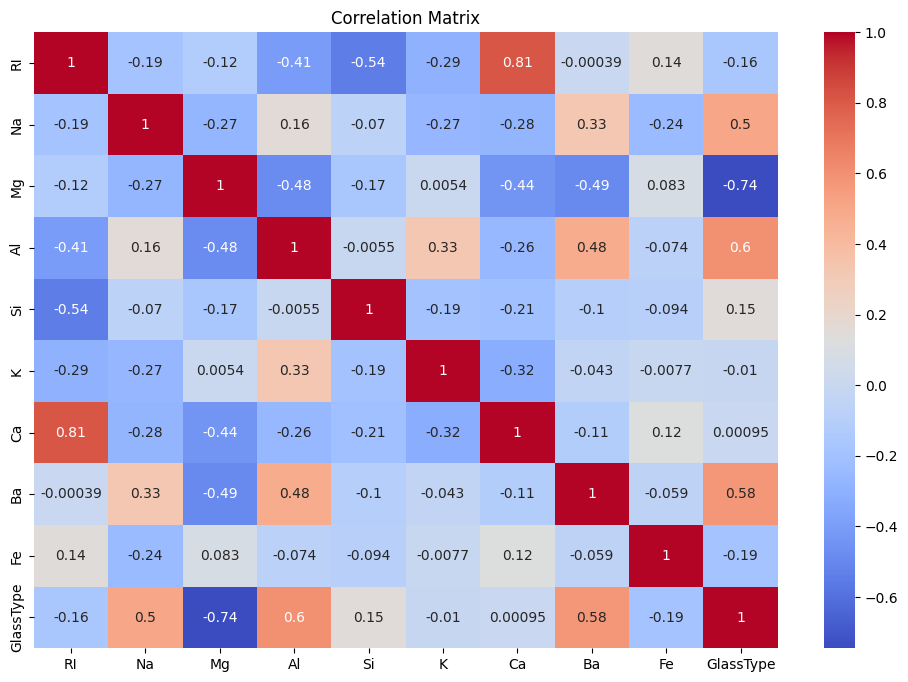

In [5]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [17]:
X = df.drop('GlassType', axis=1)
y = df['GlassType'] - 1

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [31]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

y_train_resampled = y_train_resampled.astype(int)

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

def evaluate_model(model, X_test, y_test, trained_classes):
    y_pred = model.predict(X_test)

    present_classes_in_test = np.intersect1d(np.unique(y_test), trained_classes)
    print("Classification Report:\n", classification_report(y_test, y_pred, labels=trained_classes, zero_division=0))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred, labels=trained_classes))

In [12]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_resampled, y_train_resampled)
print("Logistic Regression Results:")
evaluate_model(lr, X_test_scaled, y_test)


Logistic Regression Results:
Classification Report:
               precision    recall  f1-score   support

           1       0.67      0.57      0.62        14
           2       0.57      0.27      0.36        15
           3       0.25      0.67      0.36         3
           5       0.50      1.00      0.67         3
           6       0.67      1.00      0.80         2
           7       0.86      1.00      0.92         6

    accuracy                           0.58        43
   macro avg       0.59      0.75      0.62        43
weighted avg       0.62      0.58      0.57        43

Confusion Matrix:
 [[8 3 3 0 0 0]
 [3 4 3 3 1 1]
 [1 0 2 0 0 0]
 [0 0 0 3 0 0]
 [0 0 0 0 2 0]
 [0 0 0 0 0 6]]


In [13]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)
print("Random Forest Results:")
evaluate_model(rf, X_test_scaled, y_test)


Random Forest Results:
Classification Report:
               precision    recall  f1-score   support

           1       0.82      0.64      0.72        14
           2       0.79      0.73      0.76        15
           3       0.29      0.67      0.40         3
           5       1.00      1.00      1.00         3
           6       0.67      1.00      0.80         2
           7       1.00      0.83      0.91         6

    accuracy                           0.74        43
   macro avg       0.76      0.81      0.76        43
weighted avg       0.80      0.74      0.76        43

Confusion Matrix:
 [[ 9  2  3  0  0  0]
 [ 1 11  2  0  1  0]
 [ 1  0  2  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  2  0]
 [ 0  1  0  0  0  5]]


In [14]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_resampled, y_train_resampled)
print("KNN Results:")
evaluate_model(knn, X_test_scaled, y_test)


KNN Results:
Classification Report:
               precision    recall  f1-score   support

           1       0.80      0.57      0.67        14
           2       0.62      0.53      0.57        15
           3       0.29      0.67      0.40         3
           5       0.60      1.00      0.75         3
           6       0.67      1.00      0.80         2
           7       1.00      0.83      0.91         6

    accuracy                           0.65        43
   macro avg       0.66      0.77      0.68        43
weighted avg       0.71      0.65      0.66        43

Confusion Matrix:
 [[8 3 3 0 0 0]
 [2 8 2 2 1 0]
 [0 1 2 0 0 0]
 [0 0 0 3 0 0]
 [0 0 0 0 2 0]
 [0 1 0 0 0 5]]


In [15]:
svm = SVC(kernel='rbf', C=1, gamma='scale')
svm.fit(X_train_resampled, y_train_resampled)
print("SVM Results:")
evaluate_model(svm, X_test_scaled, y_test)


SVM Results:
Classification Report:
               precision    recall  f1-score   support

           1       0.69      0.64      0.67        14
           2       0.71      0.67      0.69        15
           3       0.25      0.33      0.29         3
           5       1.00      1.00      1.00         3
           6       0.50      0.50      0.50         2
           7       0.86      1.00      0.92         6

    accuracy                           0.70        43
   macro avg       0.67      0.69      0.68        43
weighted avg       0.70      0.70      0.70        43

Confusion Matrix:
 [[ 9  3  2  0  0  0]
 [ 3 10  1  0  1  0]
 [ 1  1  1  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  0  0  0  1  1]
 [ 0  0  0  0  0  6]]


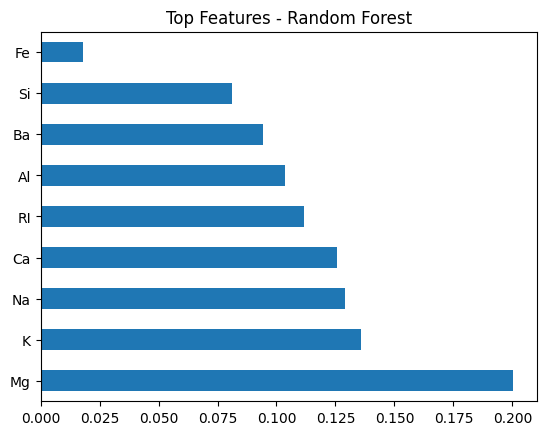

In [34]:
# Feature Importance
importances = rf.feature_importances_
feature_names = X.columns
feat_importances = pd.Series(importances, index=feature_names)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top Features - Random Forest")
plt.show()
